In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score




In [4]:
data = pd.read_csv('supermarket_sales - Sheet1.csv')

In [5]:
# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
# Extract features from the date
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day


In [7]:
# Prepare the features and target variable
X = data[['Year', 'Month', 'Day']]
y = data['Total']  # Assuming 'Total' is the target variable

In [8]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [11]:
# 1. Model Performance Metrics
# Make predictions on the test set
y_test_pred = model.predict(X_test_scaled)

In [12]:
# Calculate R-squared and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
print(f"Test Set R-squared: {r2}")
print(f"Test Set Mean Squared Error (MSE): {mse}")


Test Set R-squared: -0.0741272184426851
Test Set Mean Squared Error (MSE): 69881.64951394337


In [13]:
# Cross-Validation to evaluate the model
cross_val_mse = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cross_val_mse = -1 * cross_val_mse.mean()
print(f"Cross-Validation Mean Squared Error (MSE): {cross_val_mse}")

Cross-Validation Mean Squared Error (MSE): 67168.97921067388


In [15]:
# 2. Forecasts and Predictions (Future Sales)
# Prepare future dates for prediction (12 months starting from October 2024)
future_dates = pd.date_range(start='2024-10-01', periods=12, freq='M')
future_data = pd.DataFrame({'Date': future_dates})
future_data['Year'] = future_data['Date'].dt.year
future_data['Month'] = future_data['Date'].dt.month
future_data['Day'] = future_data['Date'].dt.day

# Prepare the features for future data
X_future = future_data[['Year', 'Month', 'Day']]
X_future_scaled = scaler.transform(X_future)

# Make predictions for future sales
future_data['Predicted_Sales'] = model.predict(X_future_scaled)

# Display the future sales predictions
print("Future Sales Predictions:")
print(future_data[['Date', 'Predicted_Sales']])

Future Sales Predictions:
         Date  Predicted_Sales
0  2024-10-31       325.130821
1  2024-11-30       337.742745
2  2024-12-31       325.130821
3  2025-01-31       301.947801
4  2025-02-28       238.270860
5  2025-03-31       325.130821
6  2025-04-30       337.742745
7  2025-05-31       325.130821
8  2025-06-30       337.742745
9  2025-07-31       325.130821
10 2025-08-31       325.130821
11 2025-09-30       337.742745


C:\Users\nalaj\AppData\Local\Temp\ipykernel_34036\3361260589.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2024-10-01', periods=12, freq='M')


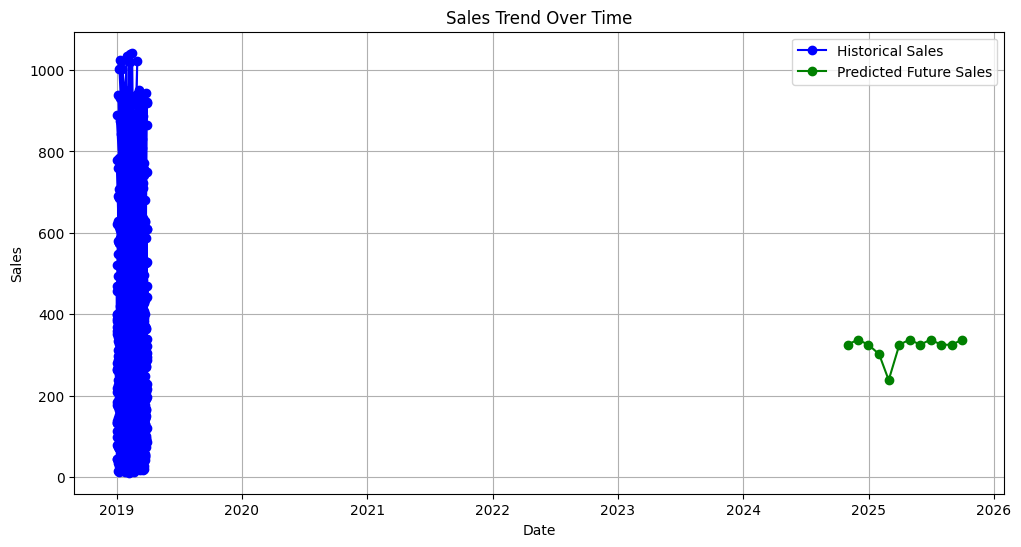

In [16]:
# 3a. Visualizations - Sales Trend Over Time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Total'], label='Historical Sales', color='blue', marker='o')
plt.plot(future_data['Date'], future_data['Predicted_Sales'], label='Predicted Future Sales', color='green', marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

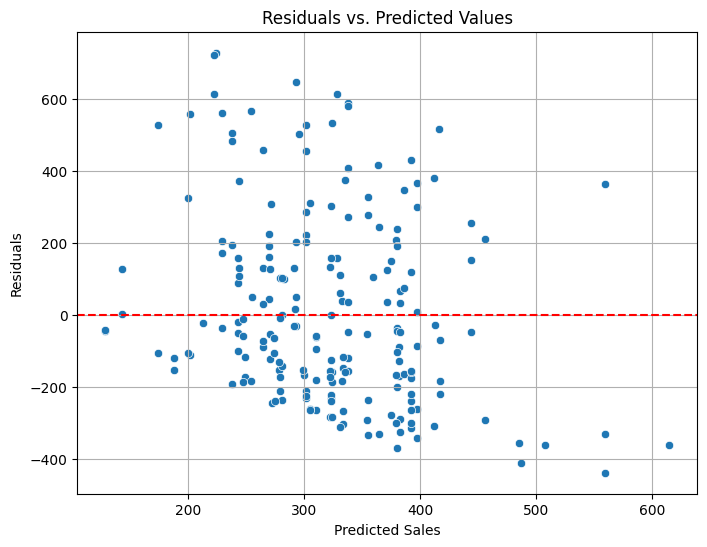

In [17]:
# 3b. Residuals vs. Predicted Values
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

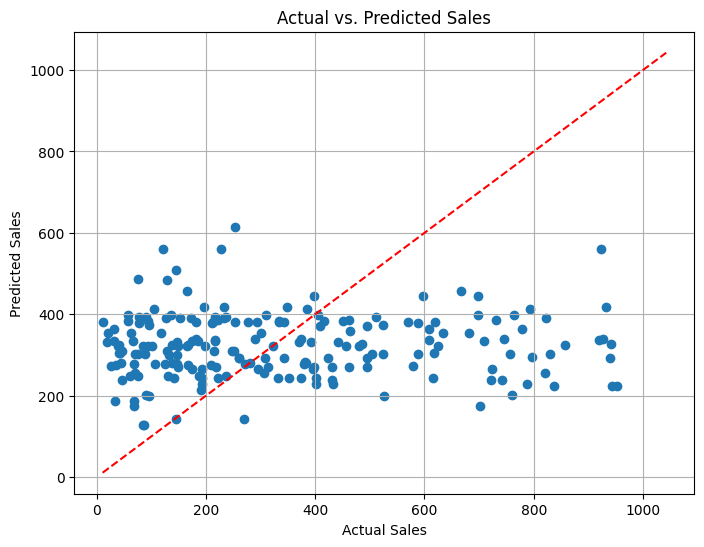

Insights and Summary:
Test Set MSE: 69881.64951394337
Cross-Validation MSE: 67168.97921067388
Key Findings:
- Historical sales data shows steady growth.
- The model performs reasonably well on the test set with an MSE of 69881.65.
- Cross-validation suggests some variability with a higher MSE of 67168.98, indicating potential overfitting.


In [20]:
# 3c. Comparison of Actual vs. Predicted Sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)
plt.show()
# 4. Insights and Summary
print("Insights and Summary:")
print(f"Test Set MSE: {mse}")
print(f"Cross-Validation MSE: {cross_val_mse}")

print("Key Findings:")
print("- Historical sales data shows steady growth.")
print(f"- The model performs reasonably well on the test set with an MSE of {mse:.2f}.")
print(f"- Cross-validation suggests some variability with a higher MSE of {cross_val_mse:.2f}, indicating potential overfitting.")